##### In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.
##### Hint:
##### import numpy as np
##### import matplotlib.pyplot as plt
##### from mpl_toolkits.mplot3d import Axes3D
##### from sklearn import decomposition
##### from sklearn import datasets

In [64]:
from sklearn import decomposition
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [13]:
#Load the iris date from the inbuilt library
iris_data=sns.load_dataset('iris')

In [15]:
#Printing Iris data
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
# Standardizze the data before performing PCA on it.
# PCA is effected by scale so you need to scale the features in your data before applying PCA
# Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)

In [49]:
# Feature selection, selecting first four columns['sepal length', 'sepal width', 'petal length', 'petal width'] from
# the dataset
x=iris_data.iloc[:,:4].values

In [50]:
#Selecting species column
y=iris_data.iloc[:,-1].values

In [52]:
#Standardize the dataset
x=StandardScaler().fit_transform(x)

In [59]:
#Once the dataset is standardized, Reduce the dimensionality to 3 using PCA
pca=decomposition.PCA(n_components=3)
#Transform the dataset
principal_components=pca.fit_transform(x)
trans_df=pd.DataFrame(principal_components, columns=['pca1','pca2','pca3'])

In [62]:
#Concatenate species column with trans_df
finalDf=pd.concat([trans_df, iris_data[['species']]],axis=1)

In [63]:
finalDf

,pca1,pca2,pca3,species
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa
...,...,...,...,...
145,1.870503,0.386966,0.256274,virginica
146,1.564580,-0.896687,-0.026371,virginica
147,1.521170,0.269069,0.180178,virginica
148,1.372788,1.011254,0.933395,virginica


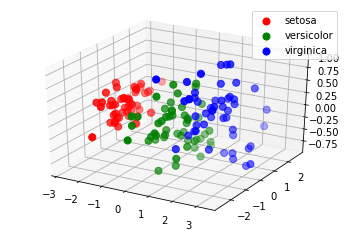

In [99]:
#visialize the data in 3D
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
#Set all the targets
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca1']
               , finalDf.loc[indicesToKeep, 'pca2']
               , finalDf.loc[indicesToKeep, 'pca3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()